# Demo 4

In [1]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

In [2]:
qubits = 2

In [3]:
dev = qml.device("default.qubit", wires=qubits)

## Use templates to quickly create a model

In [4]:
@qml.qnode(dev)
def cos(weights, x=None):
    qml.RX(x, wires=0)
    qml.templates.BasicEntanglerLayers(weights, wires=range(qubits))
    return qml.expval(qml.PauliZ(0))

In [5]:
layers = 4

In [6]:
weights = qml.init.basic_entangler_layers_uniform(layers, qubits)

## Create simple dataset

In [7]:
xs = np.linspace(-np.pi, np.pi, requires_grad=False)
ys = np.cos(xs, requires_grad=True)

In [8]:
ys_untrained = [cos(weights, x=x) for x in xs]

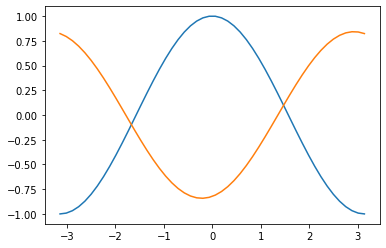

In [9]:
plt.plot(xs, ys)
plt.plot(xs, ys_untrained)

## Optimize

In [10]:
opt = qml.AdamOptimizer()

In [11]:
epochs = 10

In [12]:
for epoch in range(epochs):
    for x, y in zip(xs, ys):
        cost = lambda weights: (cos(weights, x=x) - y) ** 2
        weights = opt.step(cost, weights)

In [14]:
ys_trained = [cos(weights, x=x) for x in xs]

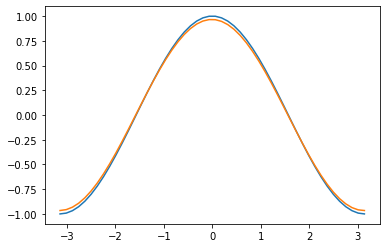

In [15]:
plt.plot(xs, ys)
plt.plot(xs, ys_trained)